# Minecraft - DSCI 100 
###### Name:  Alycia M. 
###### Student Number: 92941665

In [48]:
# loading packages 
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)
library(cowplot)

## Introduction 

Video games have evolved beyond entertainment into rich environments for behavioural research. As players interact within virtual worlds, they leave data that offer researchers opportunities to study human behaviour and engagement patterns.

Minecraft, with millions of users worldwide, is particularly popular for such studies due to its open ended gameplay and broad appeal across age groups.

At the University of British Columbia (UBC), a research team led by Dr. Frank Wood has set up a Minecraft server to collect data by recording players' actions as they navigate through the world, in which is to investigate how people play games and what factors influence their continued participation. However, running such a server is resource intensive. It requires software licenses, robust hardware, and recruitment efforts to ensure enough players contribute meaningful data. To make this sustainable, the team is interested in identifying which types of players are most likely to stay engaged.

To aid in their work, will be answering:
### Question: 
Can we predict whether a Minecraft player will subscribe based on their gender, age and hours played?




Analysis with be examined through player data set and session data set. 

## Analysis on Player Data Set

In [49]:
players <- read_csv("players.csv")
head(players,10)


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


In the player data set, it showcases behaviour and personal demographic information. It provides seven variables in whch include : 

1. experience:
- In character
- Showcases player skill level is a pro, veteran, amateur or regular.

2.  subscribe
- Logical
- Indicates whether or not the player is subscribed through true or false

3. hashedEmail
- In character
- An anonymized unique identifier for each player

4. played_hours
- In decimals
- Total hours the player has spent in the game

5. name
- In character
- Player's first name

6. gender
- In character
- Player's gender

7. Age
- In decimals
- Player's age

and there are 196 observations. 

## Analysis on Session Data Set

In [58]:
session <- read_csv("sessions.csv")
head(session,10)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


In the session data set, it captures detailed gameplay activity of an indivual. It contains five variables: 

1. hashedEmail
- In character
- An anonymized unique ID that links each session to a player

2. start_time
- In character
- Human-readable timestamp showing when the session began

3. end_time
- In character
- Human-readable timestamp showing when the session ended

4. original_start_time
- In decimals
- Timestamp when the session started

5. original_end_time
- In decimals
- Timestamp when the session ended

and there are 1535 observations.

### Issues 

There are two data sets which would be beneficial to use for the analysis. There are also more observations in the session data set compared to the player data set. Therefore, we must find a way to combine the two data sets by hashed email, summarize the session count, and combine all required variables into one dataset.

Additionally, as gender is a categorical variable, it needs to be adjusted so that it is suitable for the model and can be scaled with the other predictors, as it can lead to an unbalanced and inaccurate model.

----------------

## Methods & Results 

#### Wrangling data - Combining all data into one data set

In [51]:
session_counts <- session |> 
  group_by(hashedEmail) |> 
  summarize(session_count = n())

players_sorted <- players |> 
  arrange(hashedEmail)

session_counts_sorted <- session_counts |> 
  arrange(hashedEmail)

session_col <- session_counts_sorted |> 
  select(session_count)

players_trimmed <- players_sorted |> 
  slice(1:nrow(session_counts_sorted))

complete <- bind_cols(players_trimmed, session_col)

head(complete, 10)


experience,subscribe,hashedEmail,played_hours,name,gender,Age,session_count
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>
Regular,TRUE,0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,1.5,Isaac,Male,20,2
Veteran,TRUE,055d1a2002f6308a95b03b8d17af28f43e9f91ca8b1e1fc439bf4d08b22e7c0f,0.0,Frankie,Male,17,1
Pro,FALSE,060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,0.4,Lyra,Male,21,1
Beginner,TRUE,0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,0.1,Osiris,Male,17,13
Regular,TRUE,0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,5.6,Winslow,Male,17,2
Pro,TRUE,0d70dd9cac34d646c810b1846fe6a85b9e288a76f5dcab9c1ff1a0e7ca200b3a,1.0,Knox,Male,17,1
Veteran,FALSE,11006065e9412650e99eea4a4aaaf0399bc338006f85e80cc82d18b49f0e2aa4,0.1,Callum,Male,19,1
Amateur,TRUE,119f01b9877fc5ea0073d05602a353b91c4b48e4cf02f42bb8d661b46a34b760,0.7,Hugo,Female,21,41
Amateur,FALSE,11bf6125c4264b3a8f3bffa57b33bd598e2ea1ecd6331ad3bc54aa88e22db035,0.0,Olivia,Female,23,1


#### Note: 

From the session data set, end time and start time have been removed from the combined data set as durations have been accounted for in the player's data set through the variable played_hours..

### Determining the Relationship in Respect to Subscription through Bar Graphs

In [52]:
### cleaning data as classficatioin must be in factor form
complete <- complete |> 
  mutate(
    subscribe = as_factor(subscribe)
    #experience = as_factor(experience),
    #gender= as_factor(gender),
    #played_hours= as_factor(played_hours),
    #Age= as_factor(Age)
  ) |> select(-hashedEmail	, -name) |> filter(!is.na(Age))

# converting gender to integer values 
final <- complete |> mutate(gender = as.integer(factor(gender)))

Warning message in geom_bar(position = "dodge", bins = 30):
“Ignoring unknown parameters: `bins`”
Warning message in geom_bar(position = "dodge", bins = 30):
“Ignoring unknown parameters: `bins`”
Warning message in geom_bar(position = "dodge", bins = 30):
“Ignoring unknown parameters: `bins`”


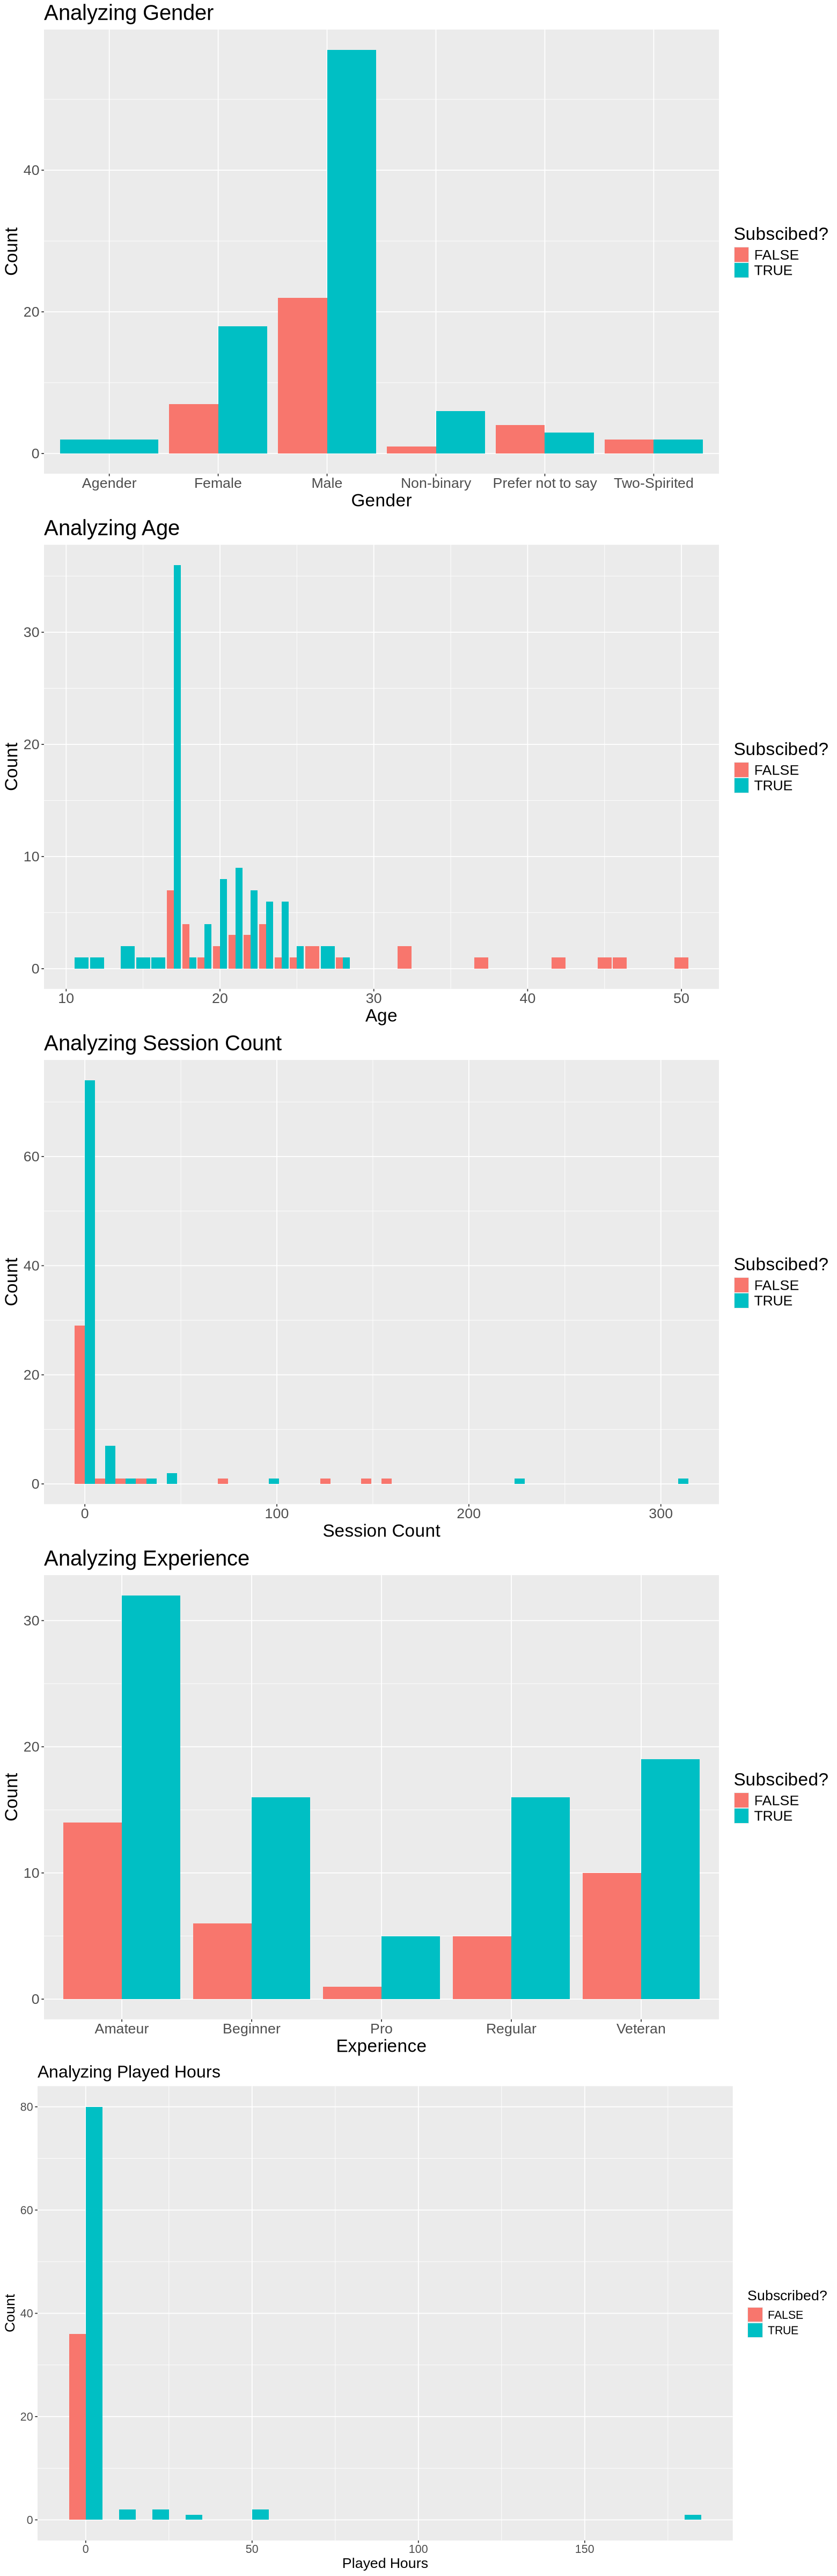

In [53]:
# plotting gender and expereince

options(repr.plot.height=40, repr.plot.width =13)

Experience <- ggplot(complete, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "dodge", bins = 30) + labs( x = "Experience" , y= "Count", fill= "Subscibed?", title= "Analyzing Experience")+ theme(text = element_text(size = 20))

Gender <-   ggplot(complete, aes(x = gender, fill = subscribe)) +
  geom_bar(position = "dodge", bins = 30) + labs( x = "Gender" , y= "Count", fill= "Subscibed?", title= "Analyzing Gender")+ theme(text = element_text(size = 20))


age <-  ggplot(complete, aes(x = Age, fill = subscribe)) +
  geom_bar(position = "dodge", bins = 30) + labs( x = "Age" , y= "Count", fill= "Subscibed?", title= "Analyzing Age ")+ theme(text = element_text(size = 20))

sessioncount <- ggplot(complete, aes(x = session_count, fill = subscribe)) +
  geom_histogram(position = "dodge", bins = 30) + labs( x = "Session Count" , y= "Count", fill= "Subscibed?", title= "Analyzing Session Count ")+ theme(text = element_text(size = 20))

playedhours <- ggplot(complete, aes(x = played_hours, fill = subscribe)) +
  geom_histogram(position = "dodge", binwidth = 10) +
  labs(
    x = "Played Hours",
    y = "Count",
    fill = "Subscribed?",
    title = "Analyzing Played Hours"
  ) +
  theme(text = element_text(size = 16))

plot <- plot_grid(Gender, age  , sessioncount, Experience , playedhours , ncol = 1)

plot


###### Figure 1. All variables presented as bar graphs in respect to subscription

### Interpretation 

All graphs have been presented as bar graphs to provide a clear, organized, and easily interpretable visualization. Each variable is displayed along the x-axis, while the y-axis represents the count of unique players associated with each variable. Additionally, as indicated through the legend, orange bars represent nonsubscribers, and blue represents subscribers.

Through the complete data set, hashedEmail and name were not plotted, as each observation has their own name and hashed email. Therefore, plotting the data would be redundant, time-consuming, and unnecessary, as no observable trend would be evident.

##### Gender 

Through the bar graph, it is observed that gender may influence whether gamers are more likely to be subscribed. For example, those who are non-binary are more likely to be subscribed compared to those who prefer not to say. Therefore, this may be a good predictor to include.


##### Age
By observing the bar graph, age may be a factor in subscription. For example, gamers past the age of 30 are less likely to be subscribed, while gamers under the age of 17 are more likely to be subscribed. Therefore, age may be a good predictor in the model.

##### Session Count 
By observing the graph, session count may not be a good predictor to include in the model. There is no trend in the session count and whether the gamer is subscribed.

##### Experience
Through this graph, it appears that for each experience, the ratio of nonsubscribers to subscribers is very similar, as it is almost a 1:3 or 1:2 ratio. Therefore, the different experiences may not be a significant predictor in determining subscribers.

##### Played Hours 
Through the graph, playing hours may be a strong indicator beyond a certain threshold (approximately 0.1 hours), at which all the points are subscribers and can be valuable to add to the model.


-----

### Determining Training and Testing Split

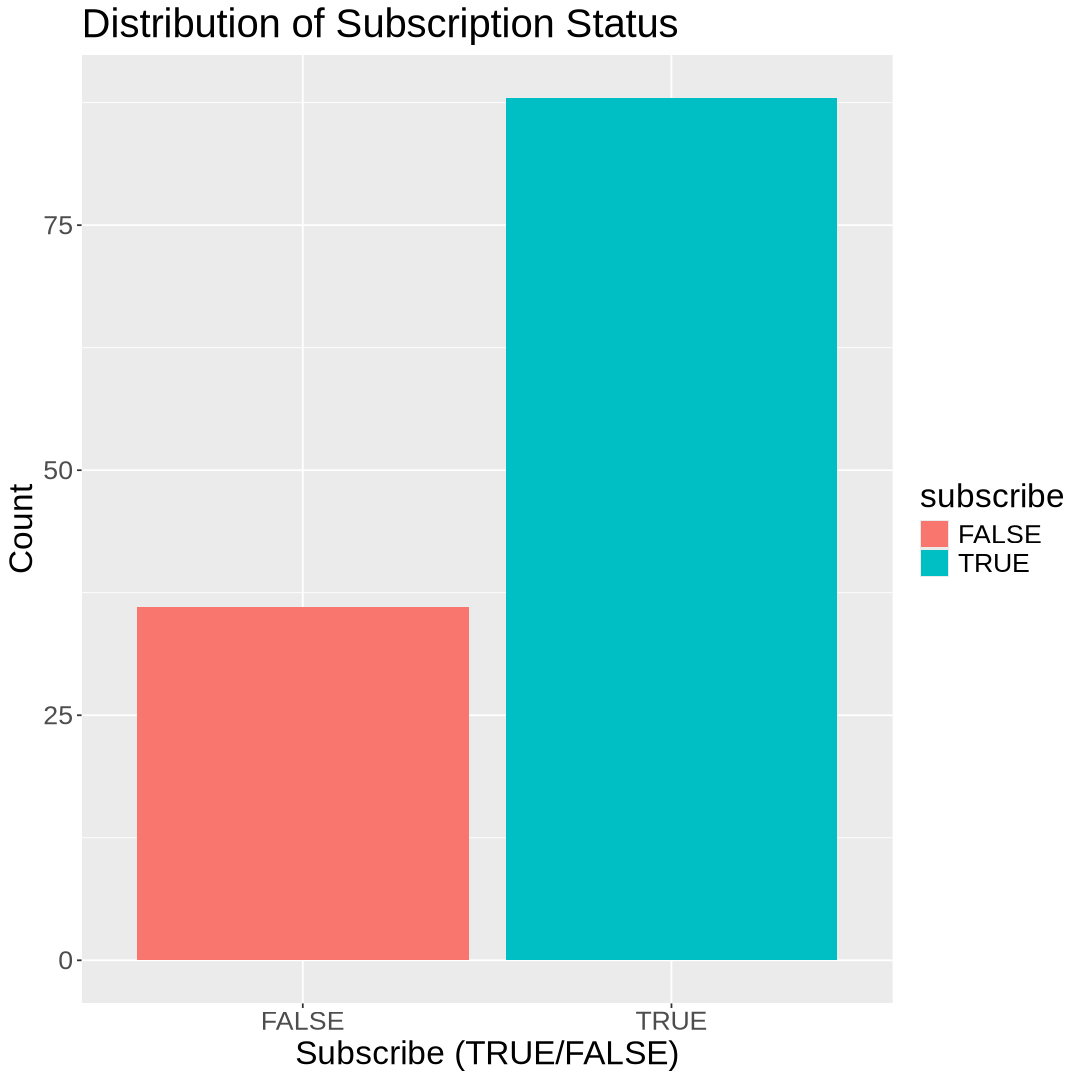

In [54]:
### plotting amount of true vs false to determine splitting percentage 

options(repr.plot.height=9, repr.plot.width = 9 )
comparsion <- complete |> 
  select(subscribe) |> 
  group_by(subscribe) |> 
  summarise(count = n())

ggplot(comparsion, aes(x = subscribe, y = count, fill = subscribe)) +
  geom_col() +
  labs(
    title = "Distribution of Subscription Status",
    x = "Subscribe (TRUE/FALSE)",
    y = "Count") +  theme(text = element_text(size = 20))






###### Figure 2. A bar graph comparing the amount of subscibers to non subscribers 

The bar graph is used to create an organized visualization for comparing the number of subscribers to nonsubscribers. Through the graph, we can see that there are more subscribers than nonsubscribers. This should be taken into consideration, as training data should have sufficient information to predict the false (nonsubscribers) accurately. A 70% to 30% split was chosen as it is a standard practice, and it still provides enough training data to build an effective model.

In [13]:
### splitting to use training and testing data
set.seed(123)
split <- initial_split(final, prop = 0.70, strata = subscribe)
train <- training(split)
test <- testing(split)

In [14]:
# added predictors as analyzed above and scaled to ensure balance 
knn_recipe <- recipe(subscribe ~   played_hours  + gender + Age , data = train) |> 
 step_center(all_predictors()) |> 
  step_scale(all_predictors())

---------------------------------

### Deciding the Method - KNN Classification 

The chosen method for modeling is K-Nearest Neighbors Classification, which is appropriate because the outcome variable is categorical and the task is supervised. The dataset includes many predictor variables, resulting in a high-dimensional feature space. Methods like linear regression or K-NN regression would not be suitable here, as they are designed for continuous outcomes and assume linear or quantitative relationships. Clustering methods are also inappropriate, as they are unsupervised and not intended for predicting known labels.

One limitation of using K-NN classification is that it can perform poorly when the dataset contains irrelevant or noisy features. Since K-NN relies on distance calculations, features that are not scaled correctly or are uninformative can distort those distances and lead to incorrect classifications.


In [17]:
knn_spec <- nearest_neighbor(weight_func= "rectangular", neighbors = tune()) |> 
  set_mode("classification") |> 
  set_engine("kknn")

In [18]:
knn_workflow <- workflow() |> 
  add_recipe(knn_recipe) |> 
  add_model(knn_spec)

In [19]:
set.seed(123)
folds <- vfold_cv(train, v = 5, strata = subscribe)

k_grid <- tibble(neighbors = seq(from = 1, to = 20, by = 1))


In [20]:
knn_tuned <- tune_grid(
  knn_workflow,
  resamples = folds,
  grid = k_grid
) |> collect_metrics()

In [21]:
accuracy_results <- knn_tuned |> 
  filter(.metric == "accuracy")

accuracy_results_sorted <- accuracy_results |> 
  arrange(desc(mean)) 
best_k <- slice(accuracy_results_sorted, 1)

best_k

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
7,accuracy,binary,0.7777778,5,0.0300227,Preprocessor1_Model07


###### Figure 3: Best KNN Value 

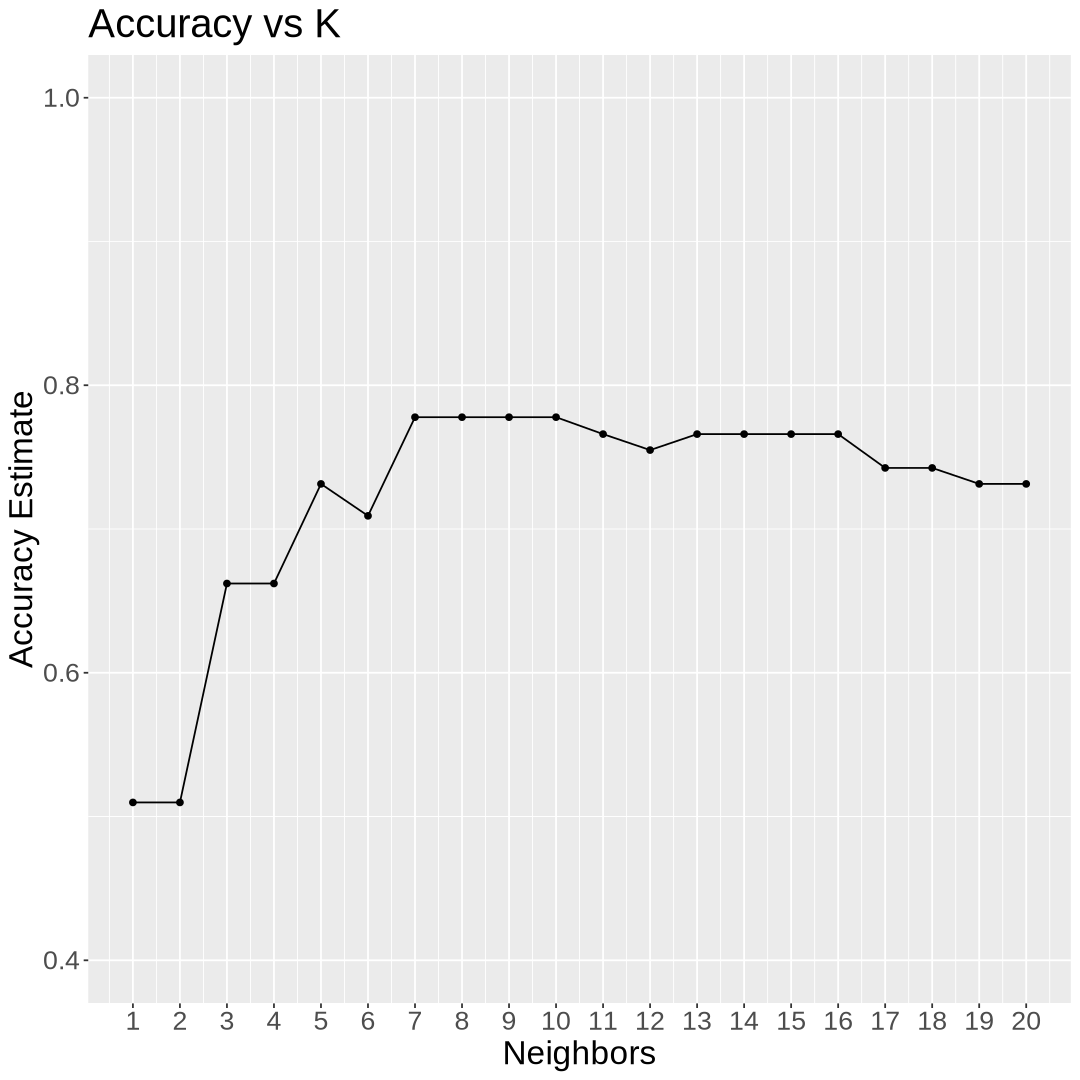

In [59]:
 accuracy_versus_k <- ggplot( accuracy_results, aes(x = neighbors, y = mean))+
      geom_point() +
     geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 50, by = 1)) +  # adjusting the x-axis
      scale_y_continuous(limits = c(0.4, 1.0))  +theme(text= element_text(size=20)) + ggtitle("Accuracy vs K")  


 accuracy_versus_k

###### Figure 4: Line graph further supporting 7 nearest neighbours produces greatest accuracy 

In [56]:
#using k =7 
knn_spec_best <- nearest_neighbor(weight_func= "rectangular" , neighbors = 7) |> 
  set_mode("classification") |> 
  set_engine("kknn")

knn_workflow_best <- workflow() |> 
  add_recipe(knn_recipe) |> 
  add_model(knn_spec_best) |> fit(data=train)

final_predictions <- predict(knn_workflow_best, test)|> bind_cols( test)


fruit_prediction_accuracy <- final_predictions|>
     metrics(truth = subscribe, estimate = .pred_class	)       
fruit_prediction_accuracy


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7368421
kap,binary,0.1845494


###### Figure 5: Accuracy Value 

In [57]:

fruit_mat <- final_predictions |> 
  conf_mat(truth = subscribe, estimate = .pred_class	)
fruit_mat

          Truth
Prediction FALSE TRUE
     FALSE     2    1
     TRUE      9   26

###### Figure 6: Confusion Matrix 

------------------------------------

## Disscussion 

1. Summarize what you found

Through cross-validation using the predictor's gender, hours played, and age, the optimal number of neighbours for the K-Nearest Neighbors (KNN) model was determined to be 7, as shown in Figure 4. Additionally, Figure 5, which plots accuracy estimates against different values of k, further supports this finding as the accuracy peaks at seven neighbours before beginning to decline, confirming it as the best choice for the model.

##### Interpretation of Figure 6 

Conversion of Confusion Matrix: 
1. Precision (for TRUE class)
 ≈ 0.743 = 74.3 %

2. Recall (for TRUE class)
Recall 
 ≈ 0.963 = 96.3 %

3. Accuracy
 ≈ 0.737 = 73.7 %

In this study, our goal is to predict whether a Minecraft user will subscribe based on their past behaviour and demographic information (gender, hours played and age). Since the server is resource-intensive, it is essential to ensure that there are sufficient resources to support the players. Therefore, it is valuable to identify as many subscribers as possible in which the model prioritizes high recall, achieving 96.3%. Being able to predict the positive class in this scenario is more important than identifying those who are not subscribed, as it is better to have a greater abundance of resources compared to not having enough. Having a lower precision of 74.3% is acceptable but leaves room for improvement. Additionally, when working with behavioural and demographic data, it often doesn't perfectly predict human actions, such as subscribing, so 100% accuracy is unrealistic. Therefore, 73.7 % accuracy is acceptable but can be improved.

2. Discuss whether this is what you expected to find?

Yes, the model's results are in line with expectations. As shown in Figure 1, the visualizations provided early insight into which variables might serve as strong predictors of subscription. The patterns observed in the data supported the idea that certain features, such as the number of hours played compared to the experience level, would influence the likelihood of a player subscribing. These visuals helped set expectations that were later confirmed by the model's performance.

3. discuss what impact could such findings have?


These findings could help game developers and server managers make more informed decisions about resource allocation, server maintenance, and player support. By identifying which players are most likely to subscribe, they can better plan for demand, tailor engagement strategies, and improve user retention. Additionally, understanding predictive patterns in player behaviour could help design more personalized gaming experiences or marketing efforts that encourage long-term participation.

4. discuss what future questions could this lead to?

-How can servers be adapted to attract and convert nonsubscribers? How to adapt their servers to attract those who do not subscribe. This can help them gain more traction and engagement with a variety of different people.

-Are there additional data sources that could improve the model's performance?
